In [1]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos"

Mounted at /content/drive
/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos


Donbe estoy parado

In [8]:
%pwd

'/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos'

In [ ]:
!pip install librosa

### Observar que hay adentro del directory

In [3]:
%ls

Amplitud_de_la_envolvente.ipynb
audio_resources_piano_c.wav
c_mayor.wav
conga.wav
Energy.ipynb
Espectrograma.ipynb
Fourier_Transform.ipynb
IRMAS-Sample/
kick/
Loading_Audio_and_Visualization.ipynb
master.zip
melspec.png
NNMF.ipynb
Notebook_Bandas_Mel_Mel_Spectrogram.ipynb
PCA.ipynb
snare/
spec.png
t-SNE_audio.ipynb
UMAP_audio.ipynb
Untitled
Visualizacion_de_Datos_Features_00.pptx
Visualizacion_de_Datos_NNMF_02.pptx
Visualizacion_de_Datos_PCA_01.pptx
Visualizacion_de_Datos_TSNE_and_UMAP_03.pptx
Zero_crossing_rate.ipynb


para entrar a una carpeta

In [4]:
%cd IRMAS-Sample

/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos/IRMAS-Sample


In [5]:
%ls

README.txt  Testing/  Training/


Para devolverme

In [6]:
%cd ..

/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos


In [7]:
!ls

Amplitud_de_la_envolvente.ipynb
audio_resources_piano_c.wav
c_mayor.wav
conga.wav
Energy.ipynb
Espectrograma.ipynb
Fourier_Transform.ipynb
IRMAS-Sample
kick
Loading_Audio_and_Visualization.ipynb
master.zip
melspec.png
NNMF.ipynb
Notebook_Bandas_Mel_Mel_Spectrogram.ipynb
PCA.ipynb
snare
spec.png
t-SNE_audio.ipynb
UMAP_audio.ipynb
Untitled
Visualizacion_de_Datos_Features_00.pptx
Visualizacion_de_Datos_NNMF_02.pptx
Visualizacion_de_Datos_PCA_01.pptx
Visualizacion_de_Datos_TSNE_and_UMAP_03.pptx
Zero_crossing_rate.ipynb


Observemos para un sonido puro

In [ ]:
data_path_train = "/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos"
y, sr = librosa.load(data_path_train+'/audio_resources_piano_c.wav',sr=22050) #C5 do, frecuencia 525.23 Hz

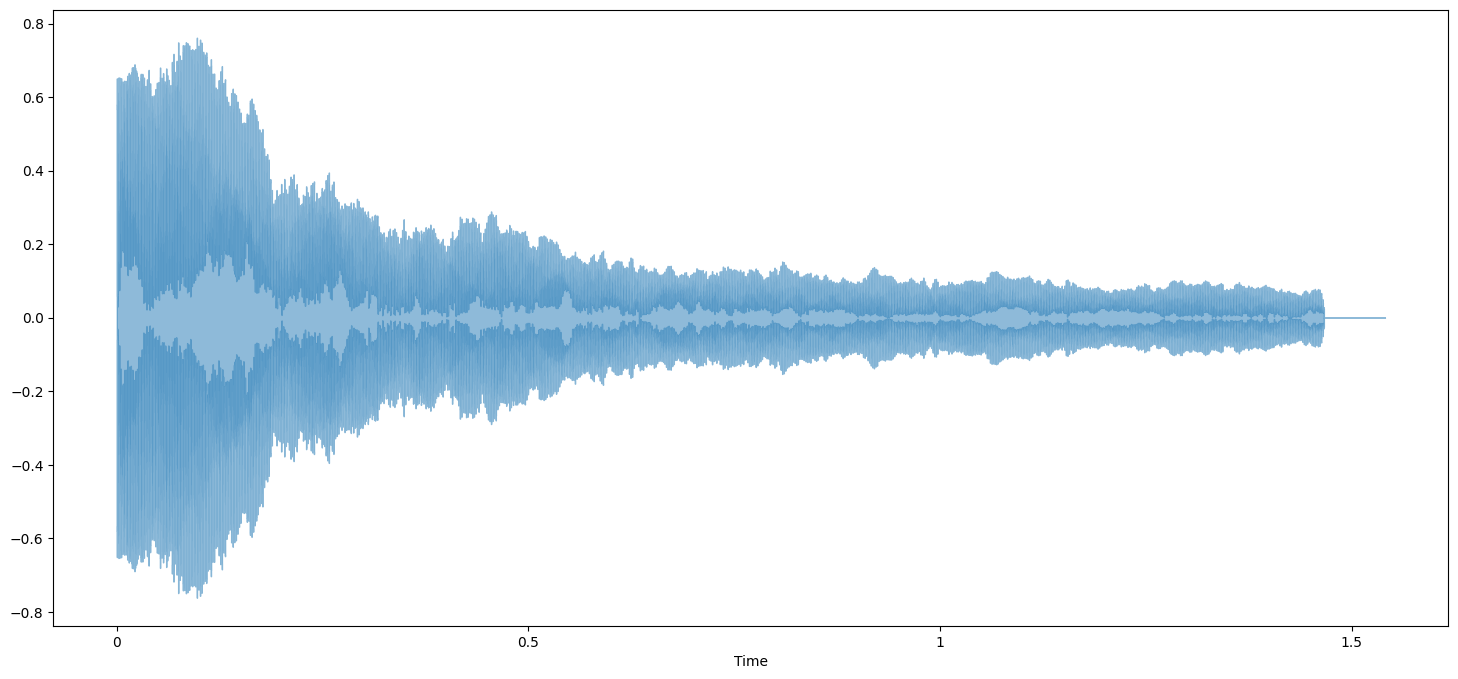

In [ ]:
# Forma de onda
plt.figure(figsize=(18, 8))
librosa.display.waveshow(y = y, sr=sr, alpha=0.5)
plt.show()

In [ ]:
# Aplicando la transformada rapida de Fourier
ft = sp.fft.fft(y)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

In [ ]:
magnitude

array([42.619125, 34.918884, 30.86985 , ..., 30.315132, 30.86985 ,
       34.918884], dtype=float32)

In [ ]:
len(frequency)

33968

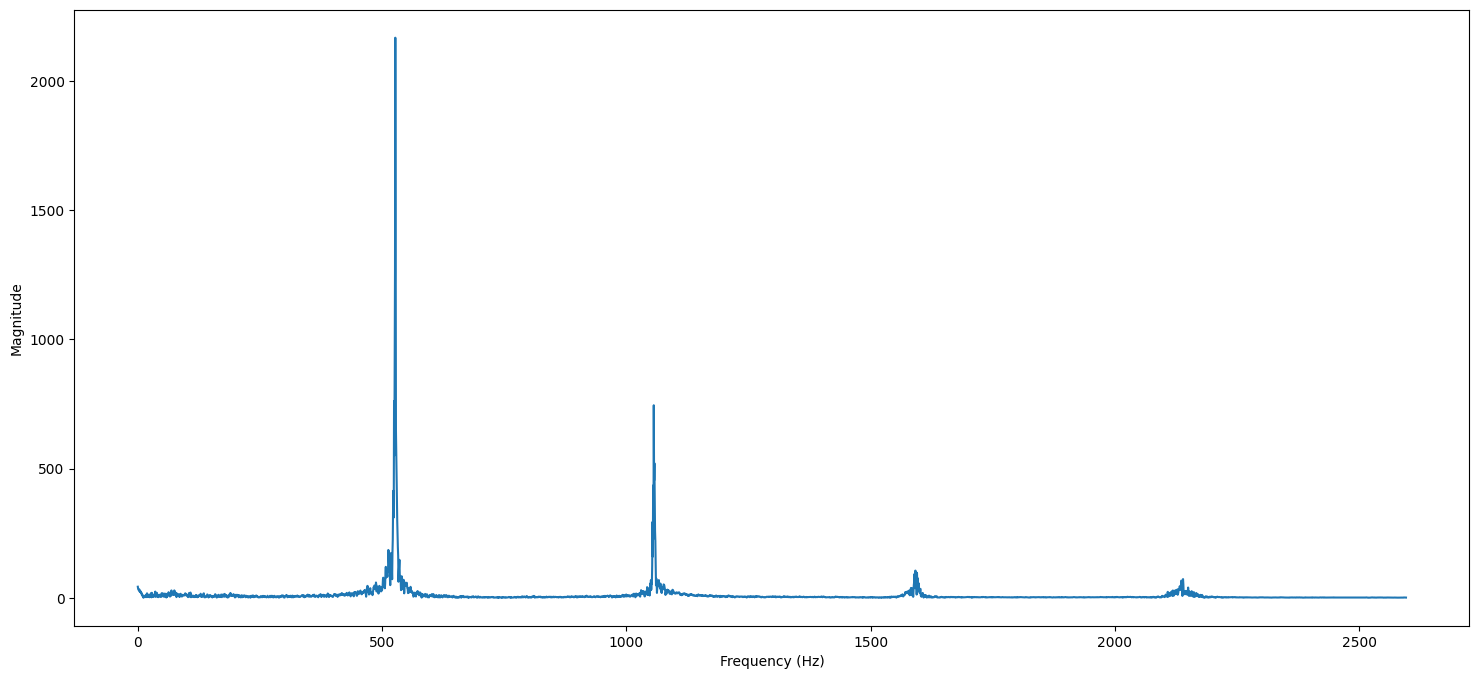

In [ ]:
# Gráfico del Espectro
plt.figure(figsize=(18, 8))
plt.plot(frequency[:4000], magnitude[:4000]) # Magnitud del Espectro
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

Es posible observar la frecuencia fundamental cerca de los 520 Hz, el doble de la frecuencia fundamental y múltiplos de esta.

# Ejemplo: comparación visual entre el sonido de piano y una señal artificial de frecuencia única.

In [ ]:
 #zoom in en la forma de onda
duracion_sample = 1/sr
print("duracion de un sample: ", duracion_sample)
print()

freq = 523
duracion_sample_523 = 1/freq
print("duracion de "+str(1) +" sample: ", duracion_sample_523)
print()


n_samples = 400
duracion_400_samples = n_samples * duracion_sample
print("duracion de "+str(n_samples) +" sample: ", duracion_400_samples)
print()


duracion de un sample:  4.5351473922902495e-05

duracion de 1 sample:  0.0019120458891013384

duracion de 400 sample:  0.018140589569160998



In [ ]:
samples = range(len(y))
t = librosa.samples_to_time(samples, sr=sr)

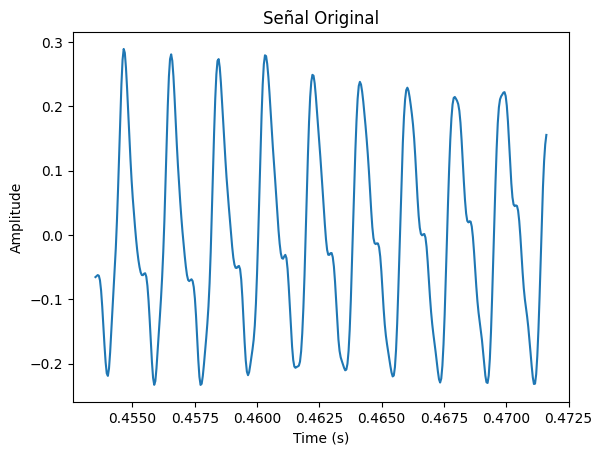

In [ ]:
f = 523
phase = 0

sinusoide = 0.5 * np.sin(2*np.pi*(f*t - phase))

plt.plot(t[10000:10400],y[10000:10400])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Señal Original")
plt.show()

In [ ]:
# Aplicando la transformada rapida de Fourier
ft = sp.fft.fft(sinusoide)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

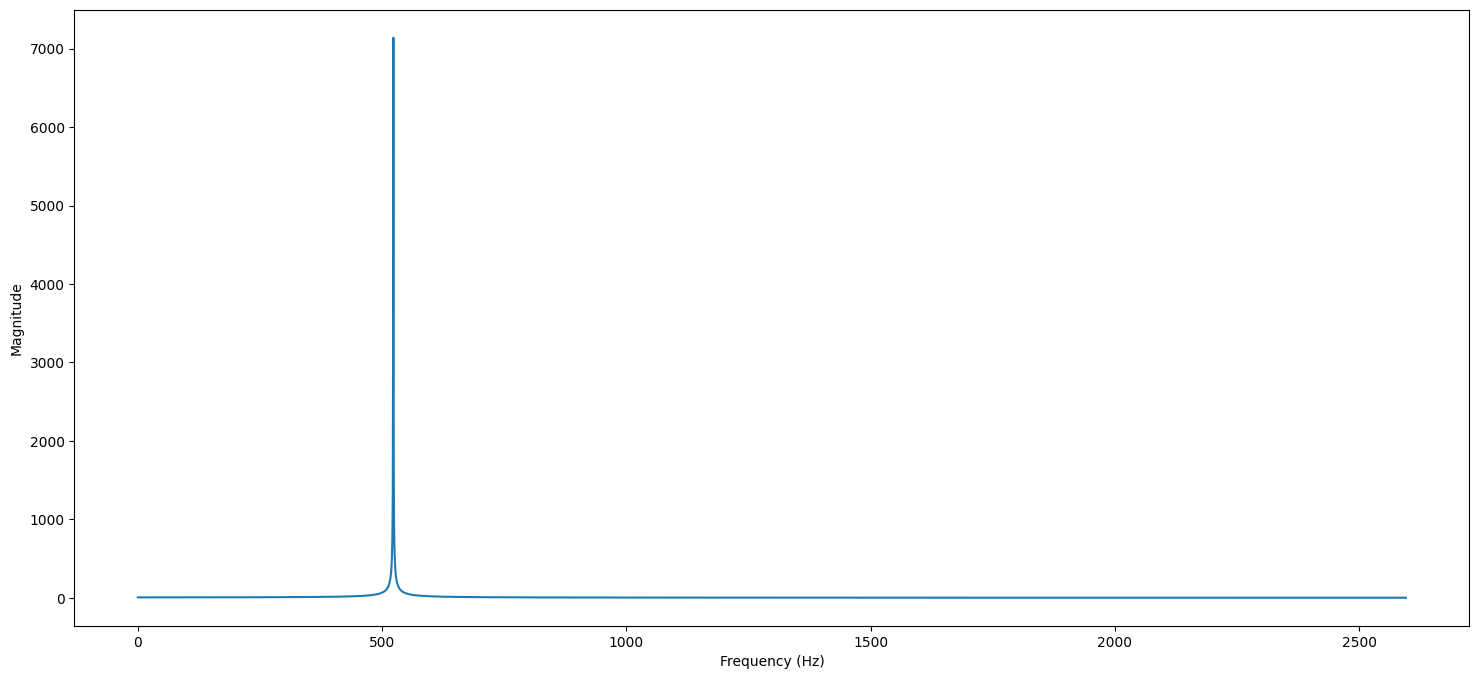

In [ ]:
# Gráfico del Espectro
plt.figure(figsize=(18, 8))
plt.plot(frequency[:4000], magnitude[:4000]) # Magnitud del Espectro
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

Observemos para un sonido complejo

In [ ]:
data_path_train = '/content/drive/MyDrive/UChile/ML/03 - Análisis y visualización de datos/IRMAS-Sample/Training'
y, sr = librosa.load(data_path_train+'/sax/118__[sax][nod][jaz_blu]1702__3.wav',sr=22050)

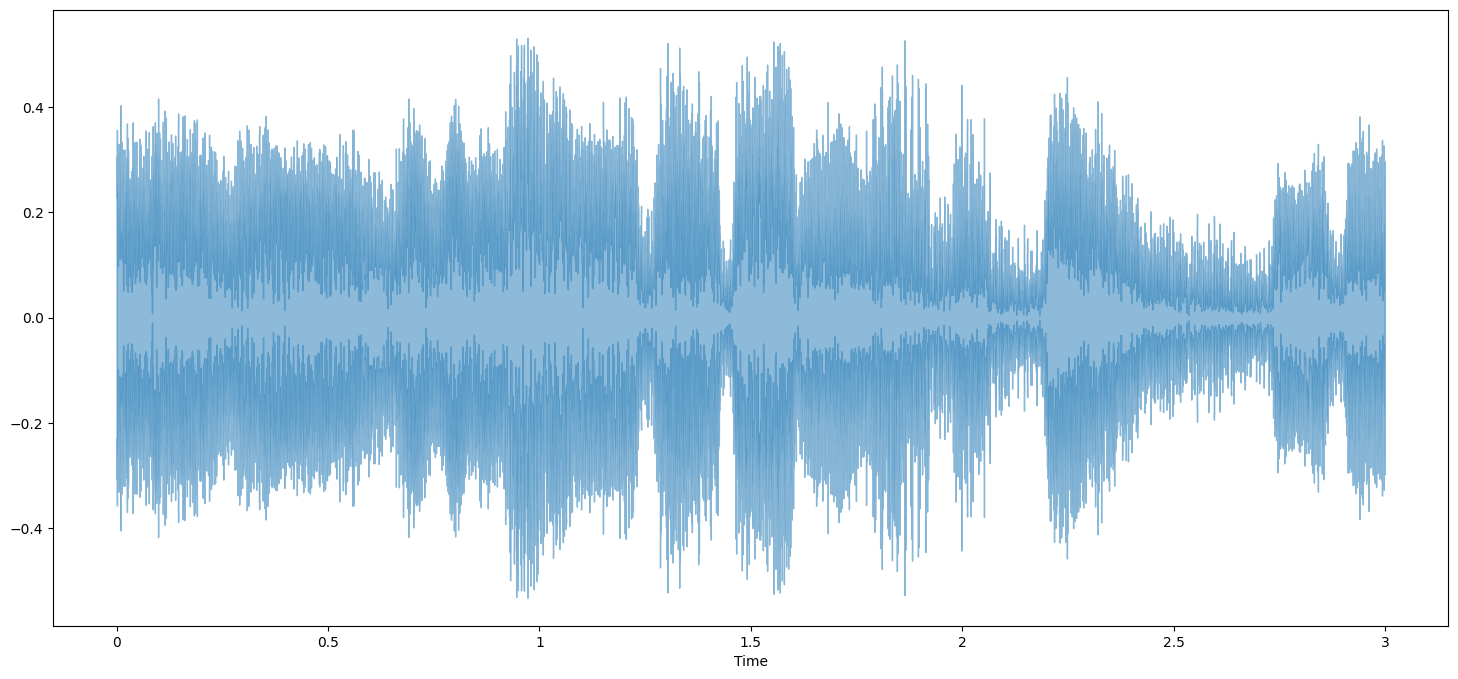

In [ ]:
# Forma de onda
plt.figure(figsize=(18, 8))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.show()

In [ ]:
# Aplicando la transformada rapida de Fourier
ft = sp.fft.fft(y)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

In [ ]:
len(frequency)

66150

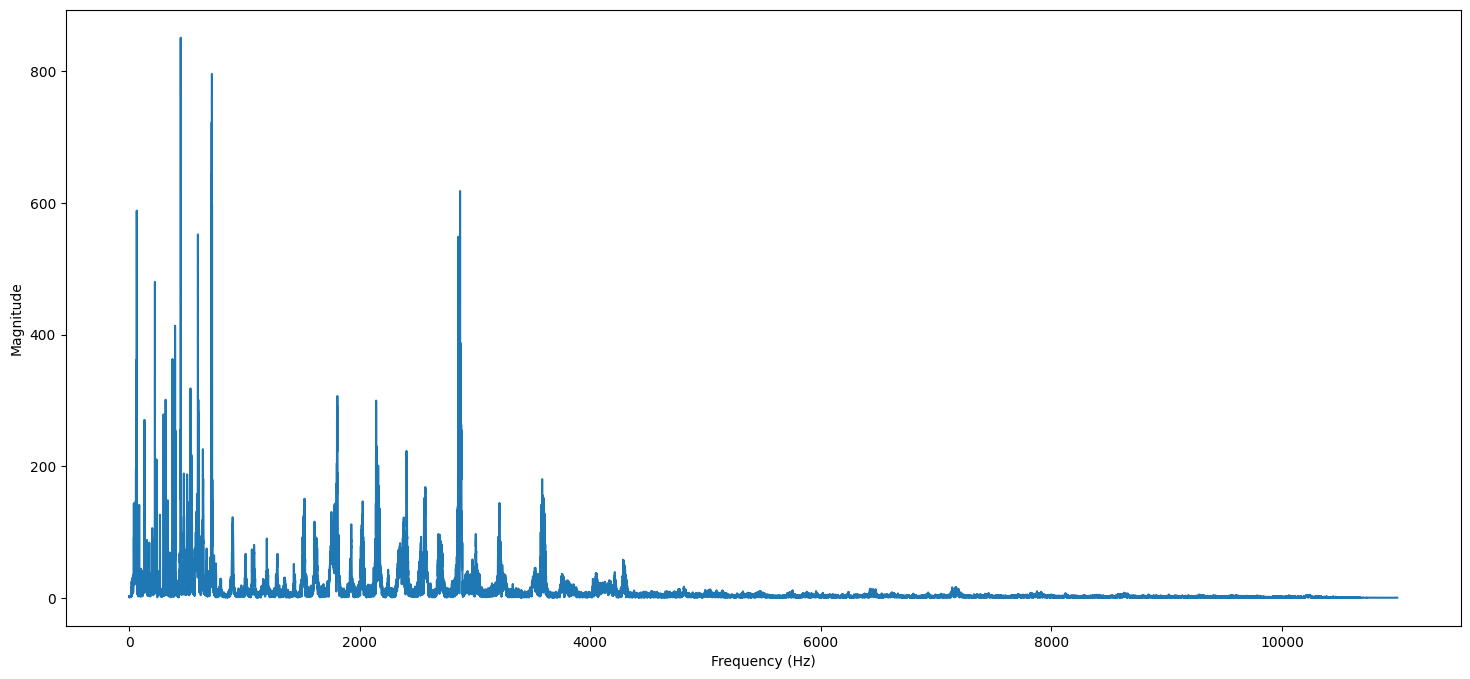

In [ ]:
# Gráfico del Espectro
plt.figure(figsize=(18, 8))
plt.plot(frequency[:33000], magnitude[:33000]) # Magnitud del Espectro
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()